In [401]:
import pandas as pd
import sqlite3

In [402]:
base = sqlite3.connect('../data/checking-logs.sqlite.sqlite_copy')

## analyze only the users and not the admins

In [403]:
table = pd.io.sql.read_sql('''
SELECT
    uid, timestamp
FROM
    checker
WHERE
    uid LIKE 'user_%'
''', base, parse_dates=['timestamp'])
table

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


## set daytime

In [404]:
table['date'] = table.timestamp.dt.date
table['hour'] = table.timestamp.dt.hour
table['daytime'] = pd.cut(
    table.hour,
    bins=[0, 4, 10, 17, 24],
    labels=['night', "morning", "afternoon", 'evening'],
    right=False,
    include_lowest=True
)

In [405]:
group = table.groupby(['date', 'daytime']).count()['hour'].reset_index()

## choose a palette that you really enjoy, you do not have to replicate it from the graph above

In [406]:
pivot = pd.pivot(group, values='hour', index='date', columns='daytime')
pivot

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


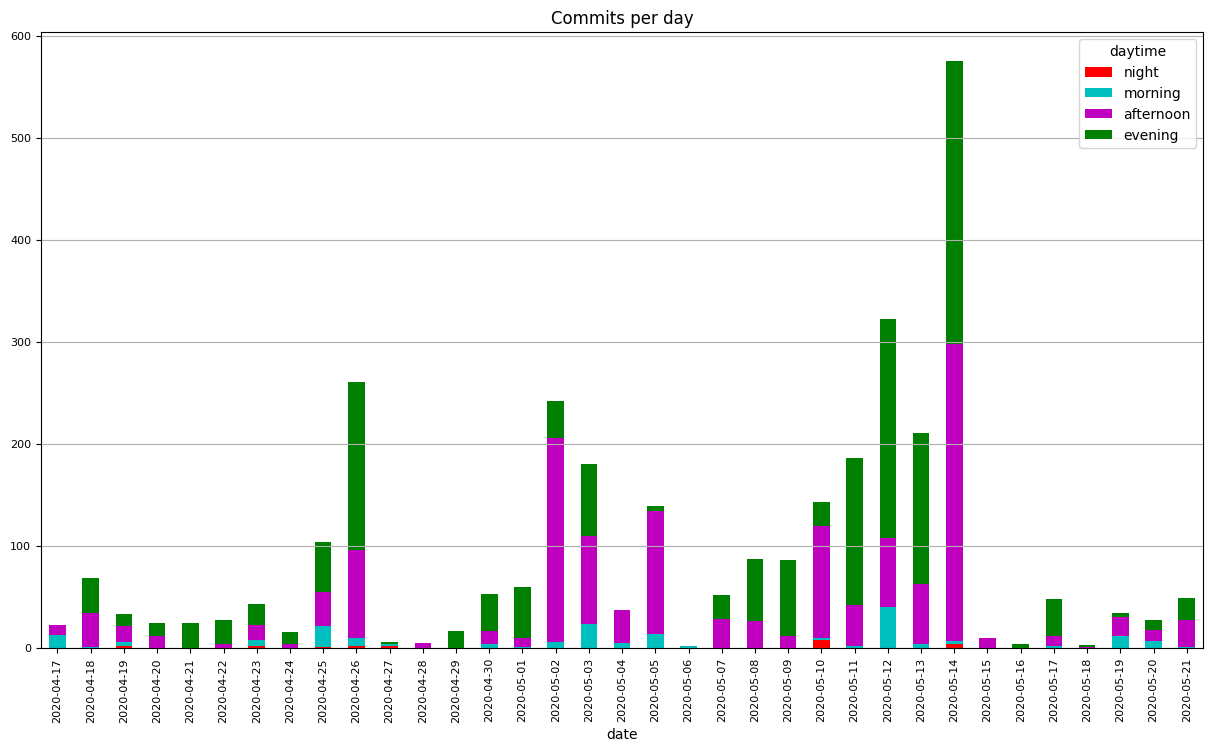

In [407]:
pivot.plot(
    fontsize=8,
    figsize=(15, 8),
    kind='bar',
    stacked=True,
    rot=90,
    title='Commits per day',
    color=['r', 'c', 'm', 'g']
).grid(
    'on',
    which='major',
    axis='y'
)

## at the end of your Jupyter Notebook, create a markdown cell and insert the questions

#### When do our users usually commit the labs: in the night, morning, afternoon, or evening?

In [408]:
p = pivot.sum().sort_values(ascending=False)
print(f"{p.index[0]} and {p.index[1]} - when our users usually commit the labs")

evening and afternoon - when our users usually commit the labs


#### the most number of commits and at the same time, the number of commits in the evening is higher than in the afternoon?

In [409]:
date = pivot[pivot['evening'] > pivot['afternoon']].sum(axis=1).idxmax()
print(f'{date} - the day when the number of commits is higher than in the afternoon')

2020-05-12 - the day when the number of commits is higher than in the afternoon


In [410]:
base.close()